In [62]:
import pandas as pd

In [63]:
df=pd.read_csv("C:/Users/joyje/OneDrive/Desktop/train_age_dataset.csv")

In [64]:
df.shape

(488877, 27)

In [65]:
df.head(100)

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.000,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000000,1
1,405231,51100441,2,2,0.000,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500000,2
2,57867,6887426,2,1,0.000,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000000,1
3,272618,50742404,2,1,0.000,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000000,1
4,251123,45589200,2,2,0.000,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,75528,46523944,2,2,0.000,0.0,0.0,0,0.0,0.0,...,0.041322,0.0,0.000000,0.004959,0.000000,0.024793,0.000000,0.000000,0.000000,1
96,510596,2467734,2,1,0.000,0.0,0.0,0,0.0,0.0,...,0.011928,0.0,0.001988,0.002386,0.011928,0.001988,0.000000,0.001988,197.500000,1
97,538027,37369460,2,2,0.024,0.0,0.0,0,0.0,0.0,...,0.400000,0.0,0.252000,0.000000,0.000000,0.504000,0.000000,0.000000,190.428571,3
98,305621,57282115,2,2,0.000,0.0,0.0,0,0.0,0.0,...,0.390476,0.0,0.000000,0.097143,0.000000,0.085714,0.400000,0.000000,0.000000,1


In [66]:
df.astype(bool).sum(axis=0)

Unnamed: 0                         488876
userId                             488877
tier                               488877
gender                             488877
following_rate                     178230
followers_avg_age                   82334
following_avg_age                   82334
max_repetitive_punc                 68986
num_of_hashtags_per_action           1103
emoji_count_per_action               4449
punctuations_per_action             26619
number_of_words_per_action         242475
avgCompletion                      488877
avgTimeSpent                       488877
avgDuration                        488877
avgComments                         44242
creations                          240551
content_views                      488877
num_of_comments                     44242
weekends_trails_watched_per_day    258715
weekdays_trails_watched_per_day    401245
slot1_trails_watched_per_day        88883
slot2_trails_watched_per_day       278141
slot3_trails_watched_per_day      

In [67]:
#df.drop(['emoji_count_per_action'],axis=1)

In [68]:
from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

In [69]:
#df.drop(['punctuations_per_action'],axis=1)

In [70]:
x_train,x_test,y_train,y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.2, random_state=2020)
x_train,x_test,y_train,y_test = x_train.reset_index(drop = True),x_test.reset_index(drop = True),y_train.reset_index(drop = True),y_test.reset_index(drop = True)

In [71]:
c = x_train.astype(bool).sum(axis=0)
d = x_test.astype(bool).sum(axis=0)
c

Unnamed: 0                         391100
userId                             391101
tier                               391101
gender                             391101
following_rate                     142468
followers_avg_age                   65867
following_avg_age                   65867
max_repetitive_punc                 55119
num_of_hashtags_per_action            883
emoji_count_per_action               3535
punctuations_per_action             21247
number_of_words_per_action         193911
avgCompletion                      391101
avgTimeSpent                       391101
avgDuration                        391101
avgComments                         35263
creations                          192418
content_views                      391101
num_of_comments                     35263
weekends_trails_watched_per_day    206998
weekdays_trails_watched_per_day    320931
slot1_trails_watched_per_day        71115
slot2_trails_watched_per_day       222821
slot3_trails_watched_per_day      

In [72]:
to_drop = ['num_of_hashtags_per_action', 'emoji_count_per_action']

#to_drop = []
#for feature in c.index:
#    if c[feature]<100000:
#        to_drop+=[feature]
#to_drop += ['followers_avg_age', 'following_avg_age', 'max_repetitive_punc', 'punctuations_per_action', 'avgComments', 'num_of_comments', 'slot1_trails_watched_per_day']
to_drop = list(set(to_drop))
to_drop
def impute_train(feature):
    global x_train
    '''
    data = pd.concat([x_train[feature],y_train], axis = 1)
    data = data[data[feature]!=0]
    class_avgs = []
    for i in range(4):
        values = list(data[data['age_group'] == i+1][feature].values)
        class_avgs += [sum(values)/len(values)]
    indices = x_train[x_train[feature] == 0].index
    for index in indices:
        x_train.at[index, feature] = class_avgs[y_train.at[index] - 1]
    '''
    data = x_train[x_train[feature]!=0][feature].values
    avg = sum(data)/len(data)
    indices = x_train[x_train[feature] == 0].index
    for index in indices:
        x_train.at[index, feature] = avg
        
total_features = list(set(x_train.columns) - set(to_drop))
for feature in total_features:
    if c[feature]<len(x_train):
        impute_train(feature)
clean_x_train = x_train.copy()

<AxesSubplot:>

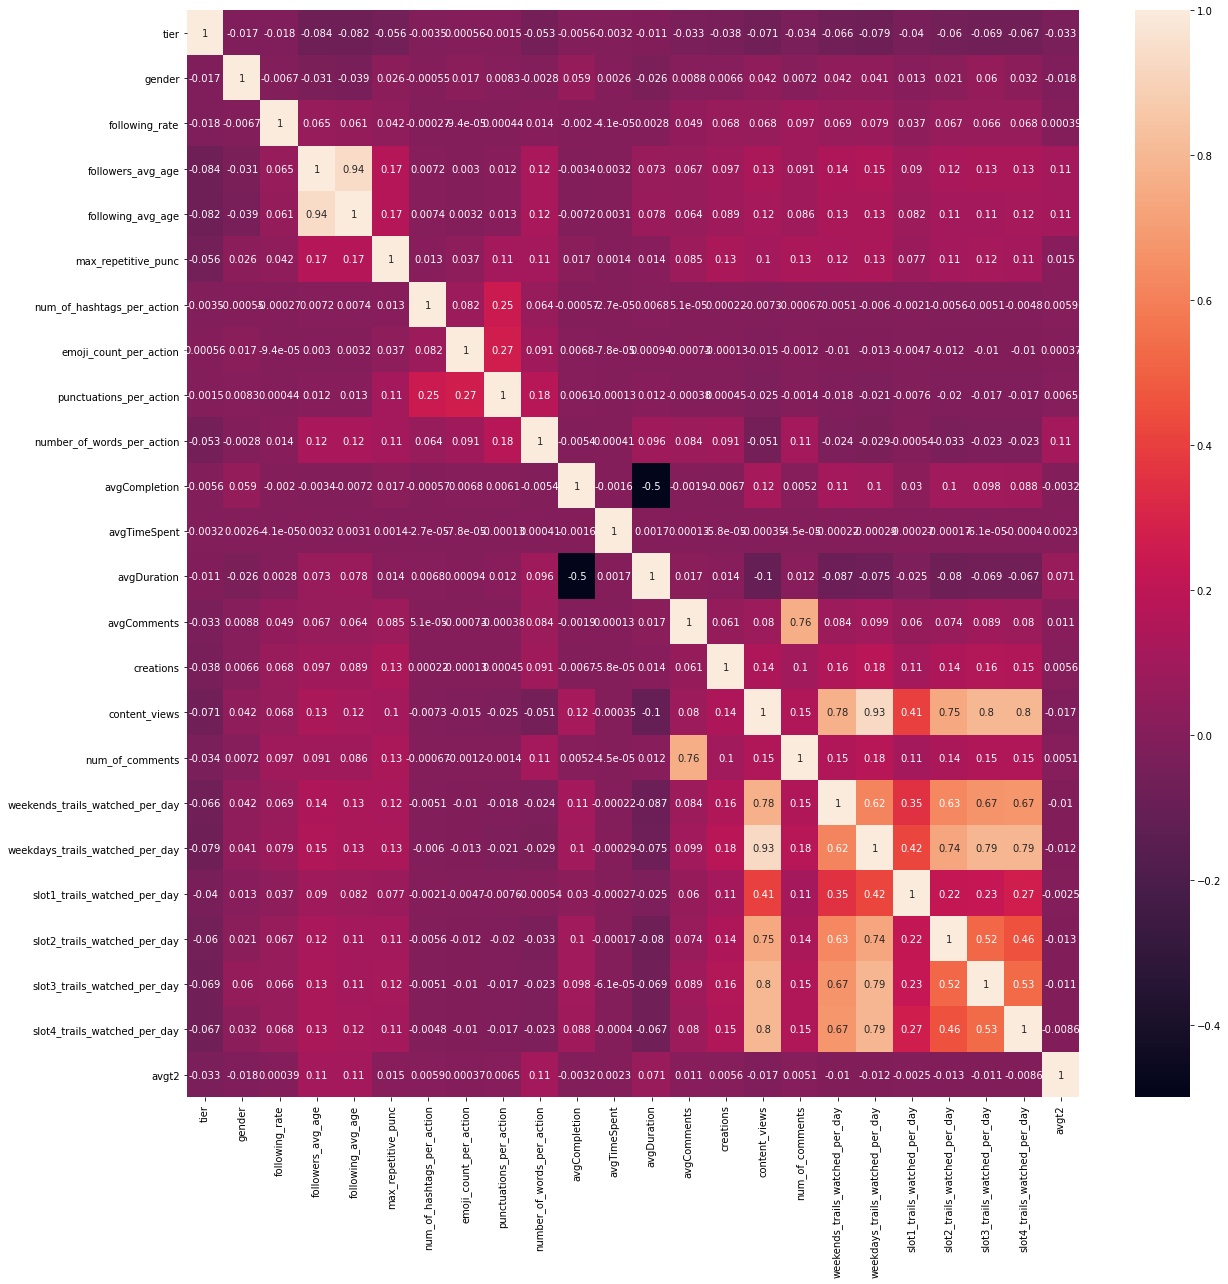

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df[df.columns[2:-1]].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True)



In [74]:

from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
n_inputs = x_train.shape[1]
print(n_inputs)
visible = Input(shape=(n_inputs,))
e = Dense(26)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
e = Dense(20)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
n_bottleneck = 10
bottleneck = Dense(n_bottleneck)(e)
d = Dense(10)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
d = Dense(20)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
output = Dense(26, activation='linear')(d)
model = Model(inputs=visible, outputs=output)
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, x_train, epochs=100, batch_size=16, verbose=1, validation_data=(x_test,x_test))
encoder = Model(inputs=visible, outputs=bottleneck)
encoder.save('encoder.h5')

26
Train on 391101 samples, validate on 97776 samples
Epoch 1/100
391101/391101 [==============================] - 321s 822us/sample - loss: 81763704489056.5781 - val_loss: 81722279109965.9531
Epoch 2/100
391101/391101 [==============================] - 204s 521us/sample - loss: 81656882023565.0781 - val_loss: 81585978190388.7031
Epoch 3/100
391101/391101 [==============================] - 200s 512us/sample - loss: 81457011415046.4688 - val_loss: 81383830094086.7500
Epoch 4/100
391101/391101 [==============================] - 201s 515us/sample - loss: 81165996305479.8906 - val_loss: 80900429652001.5156
Epoch 5/100
391101/391101 [==============================] - 200s 510us/sample - loss: 80785046286073.5938 - val_loss: 80575049665279.1250
Epoch 6/100
391101/391101 [==============================] - 199s 510us/sample - loss: 80314998307073.9062 - val_loss: 79925609216029.1562
Epoch 7/100
391101/391101 [==============================] - 198s 505us/sample - loss: 79756292939309.3438 - val

In [77]:
encoder.load_weights('encoder.h5')

In [95]:
x_train_encode=encoder.predict(x_train)
x_test_encode=encoder.predict(x_test)

x_train_encode2=pd.DataFrame(x_train_encode)
x_test_encode2=pd.DataFrame(x_test_encode)
x_train_encode1=pd.concat([x_train,x_train_encode2],axis=1)
x_train_encode1['new1'] = x_train_encode1.content_views*x_train_encode1.avgTimeSpent
x_train_encode1['new2'] = x_train_encode1.content_views*x_train_encode1.avgComments
x_train_encode1['new3'] = x_train_encode1.num_of_hashtags_per_action*x_train_encode1.num_of_comments
x_train_encode1['new4'] = x_train_encode1.punctuations_per_action*x_train_encode1.num_of_comments
x_train_encode1['new5'] = x_train_encode1.emoji_count_per_action*x_train_encode1.num_of_comments
x_train_encode1['new6'] = x_train_encode1.number_of_words_per_action*x_train_encode1.num_of_comments
x_train_encode1['new7'] = x_train_encode1.slot1_trails_watched_per_day+x_train_encode1.slot2_trails_watched_per_day+x_train_encode1.slot3_trails_watched_per_day+x_train_encode1.slot4_trails_watched_per_day
x_test_encode1=pd.concat([x_test,x_test_encode2],axis=1)
x_test_encode1['new1'] = x_test_encode1.content_views*x_test_encode1.avgTimeSpent
x_test_encode1['new2'] = x_test_encode1.content_views*x_test_encode1.avgComments
x_test_encode1['new3'] = x_test_encode1.num_of_hashtags_per_action*x_test_encode1.num_of_comments
x_test_encode1['new4'] = x_test_encode1.punctuations_per_action*x_test_encode1.num_of_comments
x_test_encode1['new5'] = x_test_encode1.emoji_count_per_action*x_test_encode1.num_of_comments
x_test_encode1['new6'] = x_test_encode1.number_of_words_per_action*x_test_encode1.num_of_comments
x_test_encode1['new7'] = x_test_encode1.slot1_trails_watched_per_day+x_test_encode1.slot2_trails_watched_per_day+x_test_encode1.slot3_trails_watched_per_day+x_test_encode1.slot4_trails_watched_per_day

In [96]:
model=xgb.XGBClassifier(n_estimators=2000)
model.fit(x_train_encode1,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
from sklearn.metrics import f1_score
y_pred = model.predict(x_test_encode1)
f1_score(y_pred,y_test,average='weighted')

0.4268355507049429

In [85]:
encoder.save_weights('encoder1.h5')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
y_pred=clf.predict(x_test)
f1_score(y_test,y_pred,average='weighted')